# **Preprocess the Data**



In [2]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Connect with drive
from google.colab import drive

drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [4]:
# Import dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/swe/synthetic_online_retail_data.csv')

In [5]:
print(df.head())

   customer_id  order_date  product_id  category_id       category_name  \
0        13542  2024-12-17         784           10         Electronics   
1        23188  2024-06-01         682           50   Sports & Outdoors   
2        55098  2025-02-04         684           50   Sports & Outdoors   
3        65208  2024-10-28         204           40  Books & Stationery   
4        63872  2024-05-10         202           20             Fashion   

  product_name  quantity   price payment_method            city  review_score  \
0   Smartphone         2  373.36    Credit Card  New Oliviaberg           1.0   
1  Soccer Ball         5  299.34    Credit Card    Port Matthew           NaN   
2         Tent         5   23.00    Credit Card      West Sarah           5.0   
3   Story Book         2  230.11  Bank Transfer  Hernandezburgh           5.0   
4        Skirt         4  176.72    Credit Card    Jenkinshaven           1.0   

  gender  age  
0      F   56  
1      M   59  
2      F   64 

In [6]:
print(df)

     customer_id  order_date  product_id  category_id       category_name  \
0          13542  2024-12-17         784           10         Electronics   
1          23188  2024-06-01         682           50   Sports & Outdoors   
2          55098  2025-02-04         684           50   Sports & Outdoors   
3          65208  2024-10-28         204           40  Books & Stationery   
4          63872  2024-05-10         202           20             Fashion   
..           ...         ...         ...          ...                 ...   
995        67967  2024-05-04         965           40  Books & Stationery   
996        99828  2024-09-12         510           40  Books & Stationery   
997        92290  2024-11-06         445           10         Electronics   
998        61427  2024-09-17         410           10         Electronics   
999        20658  2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method            city  \
0  

In [7]:
# Displaying DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [8]:
# Displaying DataFrame column data types
df.dtypes

,0
customer_id,int64
order_date,object
product_id,int64
category_id,int64
category_name,object
product_name,object
quantity,int64
price,float64
payment_method,object
city,object


In [9]:
print(df.describe())

        customer_id   product_id  category_id     quantity        price  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   55490.723000   540.726000    30.030000     2.947000   251.850660   
std    25910.185857   261.737704    14.370303     1.413573   139.194688   
min    10201.000000   100.000000    10.000000     1.000000    10.720000   
25%    33857.000000   311.750000    20.000000     2.000000   128.525000   
50%    54619.500000   542.500000    30.000000     3.000000   250.220000   
75%    77848.500000   770.750000    40.000000     4.000000   366.467500   
max    99923.000000   995.000000    50.000000     5.000000   499.500000   

       review_score          age  
count    799.000000  1000.000000  
mean       3.992491    46.382000  
std        1.239469    16.569992  
min        1.000000    18.000000  
25%        3.000000    32.000000  
50%        4.000000    47.000000  
75%        5.000000    61.000000  
max        5.000000    75.000000  


In [10]:
# Convert date columns
df['InvoiceDate'] = pd.to_datetime(df['order_date'])

In [11]:
# Drop nulls values
df.dropna(subset=['customer_id', 'product_id', 'order_date', 'category_name', 'product_name', 'quantity', 'price'], inplace=True)


In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [13]:
# Create derived columns
df['TotalPrice'] = df['quantity'] * df['price']
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Year'] = df['InvoiceDate'].dt.year
df['Quarter'] = df['InvoiceDate'].dt.quarter

In [14]:
print(df)

     customer_id  order_date  product_id  category_id       category_name  \
0          13542  2024-12-17         784           10         Electronics   
1          23188  2024-06-01         682           50   Sports & Outdoors   
2          55098  2025-02-04         684           50   Sports & Outdoors   
3          65208  2024-10-28         204           40  Books & Stationery   
4          63872  2024-05-10         202           20             Fashion   
..           ...         ...         ...          ...                 ...   
995        67967  2024-05-04         965           40  Books & Stationery   
996        99828  2024-09-12         510           40  Books & Stationery   
997        92290  2024-11-06         445           10         Electronics   
998        61427  2024-09-17         410           10         Electronics   
999        20658  2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method            city  \
0  

#  **1. Sales Trend**

    Week  TotalPrice
0      1    12537.34
1      2     8190.14
2      3     9450.54
3      4    16469.51
4      5    19536.86
5      6    14846.26
6      7     8469.46
7      8    12549.77
8      9    12965.44
9     10    12478.18
10    11    13506.04
11    12    17316.35
12    13    18252.12
13    14    12916.11
14    15    10546.33
15    16    11836.34
16    17    12587.06
17    18    11072.52
18    19    10448.91
19    20    14366.01
20    21    15038.83
21    22    19432.04
22    23    11504.58
23    24    18734.76
24    25     6061.36
25    26    16406.13
26    27    15186.73
27    28    11146.65
28    29     8678.82
29    30    17020.98
30    31    14734.96
31    32     9895.18
32    33    33000.45
33    34    12218.45
34    35    16392.65
35    36    10229.75
36    37    15034.74
37    38    17445.28
38    39    24374.28
39    40     8787.40
40    41    13890.13
41    42    11313.88
42    43    15104.05
43    44    10834.64
44    45    13101.51
45    46    19139.22
46    47    1

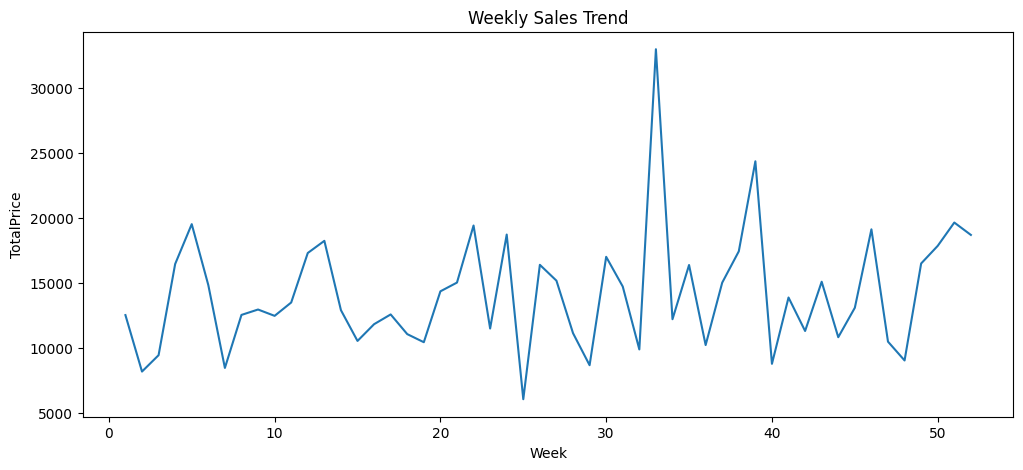

In [15]:
# Weekly Sales
weekly_sales = df.groupby('Week')['TotalPrice'].sum().reset_index()
print(weekly_sales)

plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_sales, x='Week', y='TotalPrice')
plt.title('Weekly Sales Trend')
plt.show()

      Month  TotalPrice
0   2024-03    30620.98
1   2024-04    50375.40
2   2024-05    61448.18
3   2024-06    59127.40
4   2024-07    57939.86
5   2024-08    79070.12
6   2024-09    69323.09
7   2024-10    55328.98
8   2024-11    55404.74
9   2024-12    78432.94
10  2025-01    60210.83
11  2025-02    48826.04
12  2025-03    31218.32


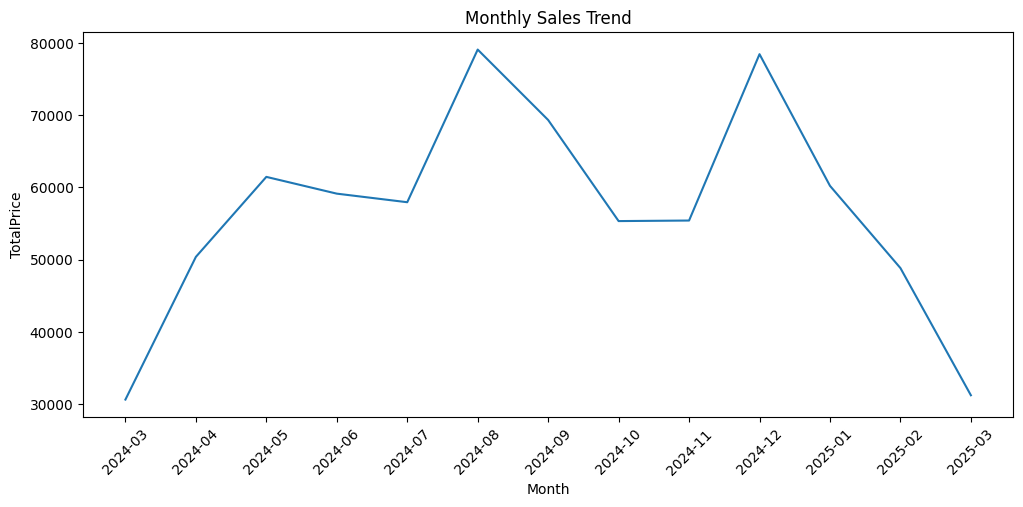

In [16]:
# Monthly Sales
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
print(monthly_sales)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()


   Year  TotalPrice
0  2024   597071.69
1  2025   140255.19


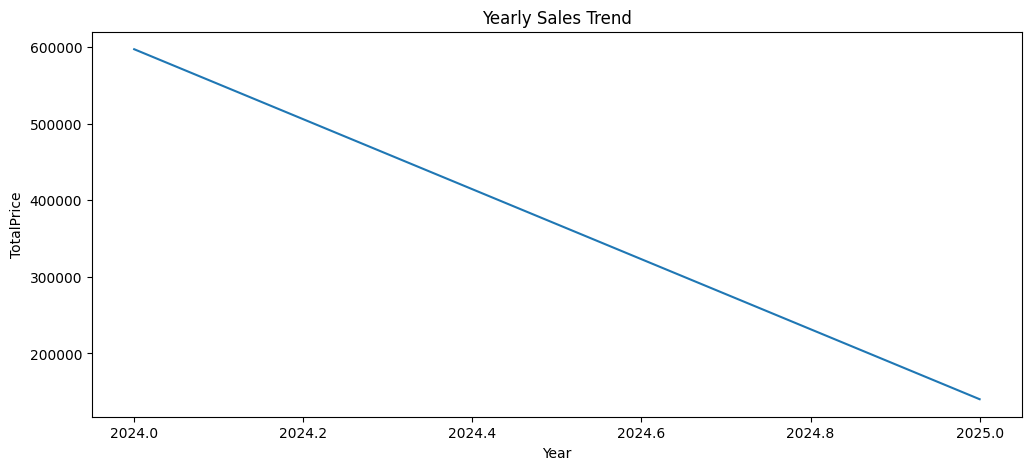

In [17]:
# yearly sales
yearly_sales = df.groupby('Year')['TotalPrice'].sum().reset_index()
print(yearly_sales)

plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly_sales, x='Year', y='TotalPrice')
plt.title('Yearly Sales Trend')
plt.show()



        Year  TotalPrice
0  49.987651   80.977882
1  50.012349   19.022118


<Figure size 1400x800 with 0 Axes>

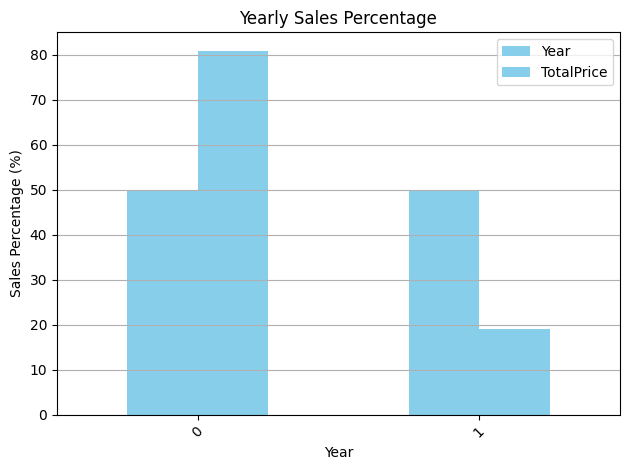

In [18]:
# yearly sales in percentage
total_sales = yearly_sales.sum()
yearly_sales_percentage = (yearly_sales / total_sales) * 100
print(yearly_sales_percentage)


plt.figure(figsize=(14, 8))
yearly_sales_percentage.plot(kind='bar', color='skyblue')

plt.title('Yearly Sales Percentage')
plt.xlabel('Year')
plt.ylabel('Sales Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


   Year  Quarter  TotalPrice
0  2024        1    30620.98
1  2024        2   170950.98
2  2024        3   206333.07
3  2024        4   189166.66
4  2025        1   140255.19


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2024'),
  Text(1, 0, '2024'),
  Text(2, 0, '2024'),
  Text(3, 0, '2024'),
  Text(4, 0, '2025')])

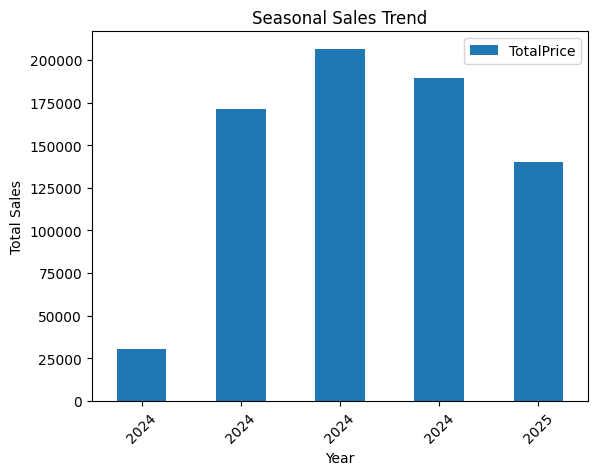

In [19]:
# Seasonal sales trend
seasonal_sales = df.groupby(['Year', 'Quarter'])['TotalPrice'].sum().reset_index()
print(seasonal_sales)

seasonal_sales.plot(x='Year', y='TotalPrice', kind='bar', stacked=True)
plt.title('Seasonal Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

In [20]:
# monthly sales growth rate
monthly_sales['GrowthRate'] = monthly_sales['TotalPrice'].pct_change() * 100
print(monthly_sales[['Month', 'GrowthRate']])

      Month  GrowthRate
0   2024-03         NaN
1   2024-04   64.512697
2   2024-05   21.980530
3   2024-06   -3.776808
4   2024-07   -2.008443
5   2024-08   36.469298
6   2024-09  -12.327071
7   2024-10  -20.186795
8   2024-11    0.136926
9   2024-12   41.563592
10  2025-01  -23.232726
11  2025-02  -18.908210
12  2025-03  -36.062150


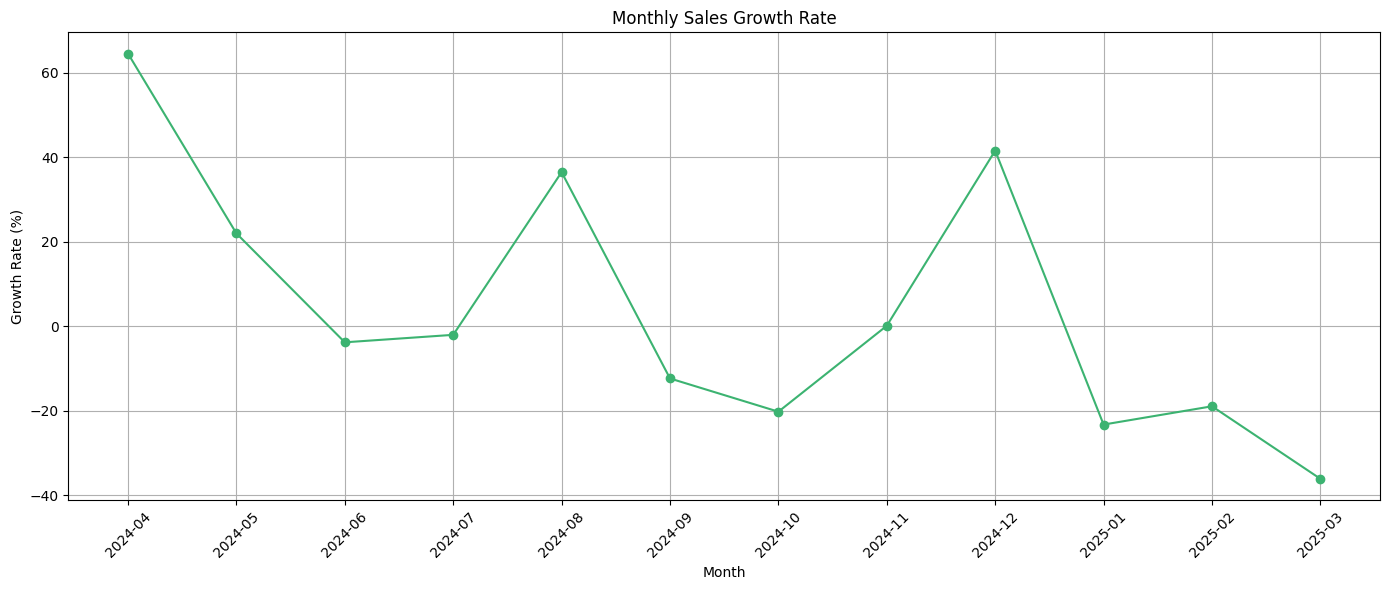

In [21]:

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['GrowthRate'], marker='o', color='mediumseagreen')

plt.title('Monthly Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Product Performance**

product_name
Smartphone     38319.26
Notebook       38027.68
Yoga Mat       37752.08
Soccer Ball    37587.30
Tablet         33581.02
Vase           32191.58
Laptop         32000.38
Smartwatch     31820.10
Headphones     30789.58
T-shirt        30718.54
Name: TotalPrice, dtype: float64


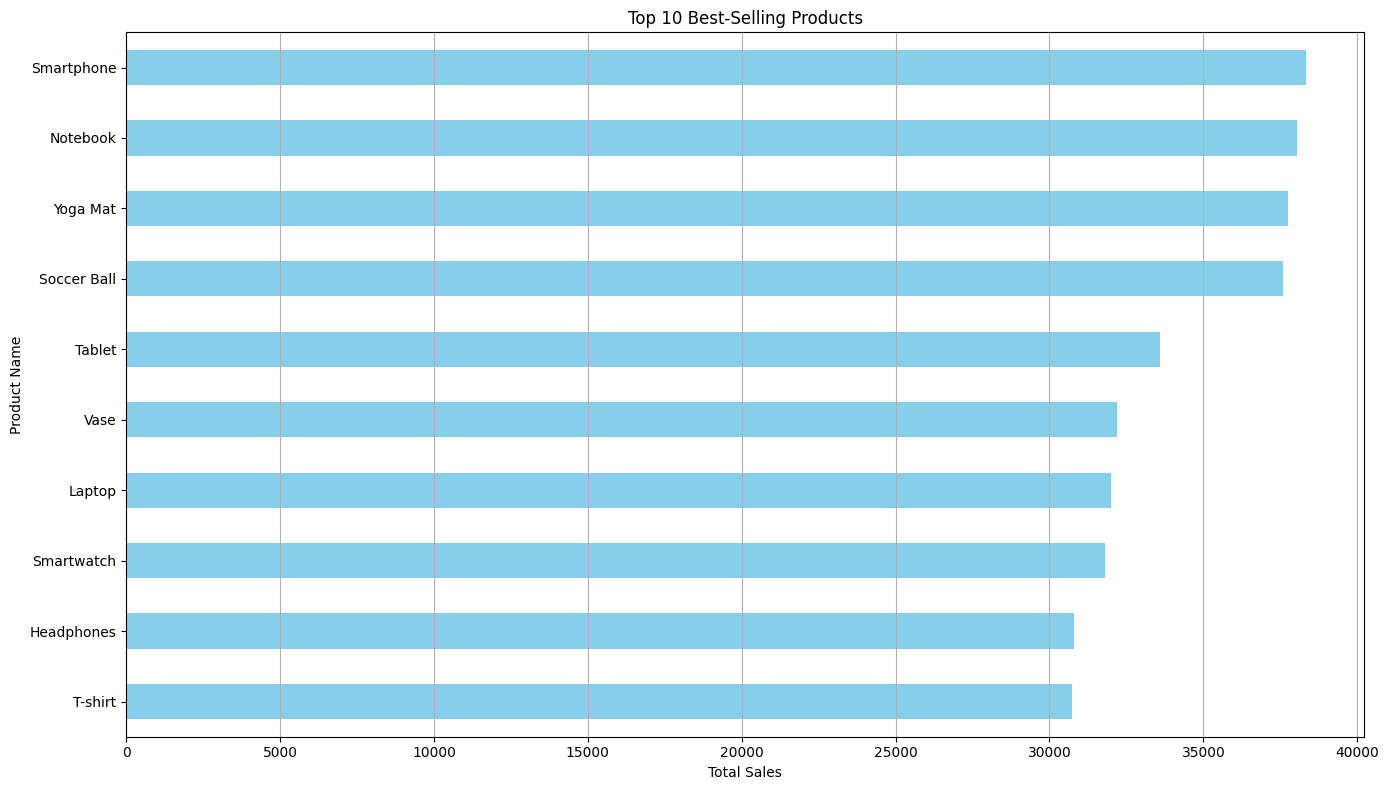

In [22]:
# Best-selling products
best_products = df.groupby('product_name')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(best_products)

plt.figure(figsize=(14, 8))
best_products.plot(kind='barh', color='skyblue')

plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
# Highest sales at the top
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

product_name
Shirt         18230.94
Novel         22750.81
Pen           23273.07
Tent          23449.52
Carpet        24175.74
Dress         25817.21
Blanket       25867.20
Basketball    26282.05
Pillow        27095.93
Story Book    29062.57
Name: TotalPrice, dtype: float64


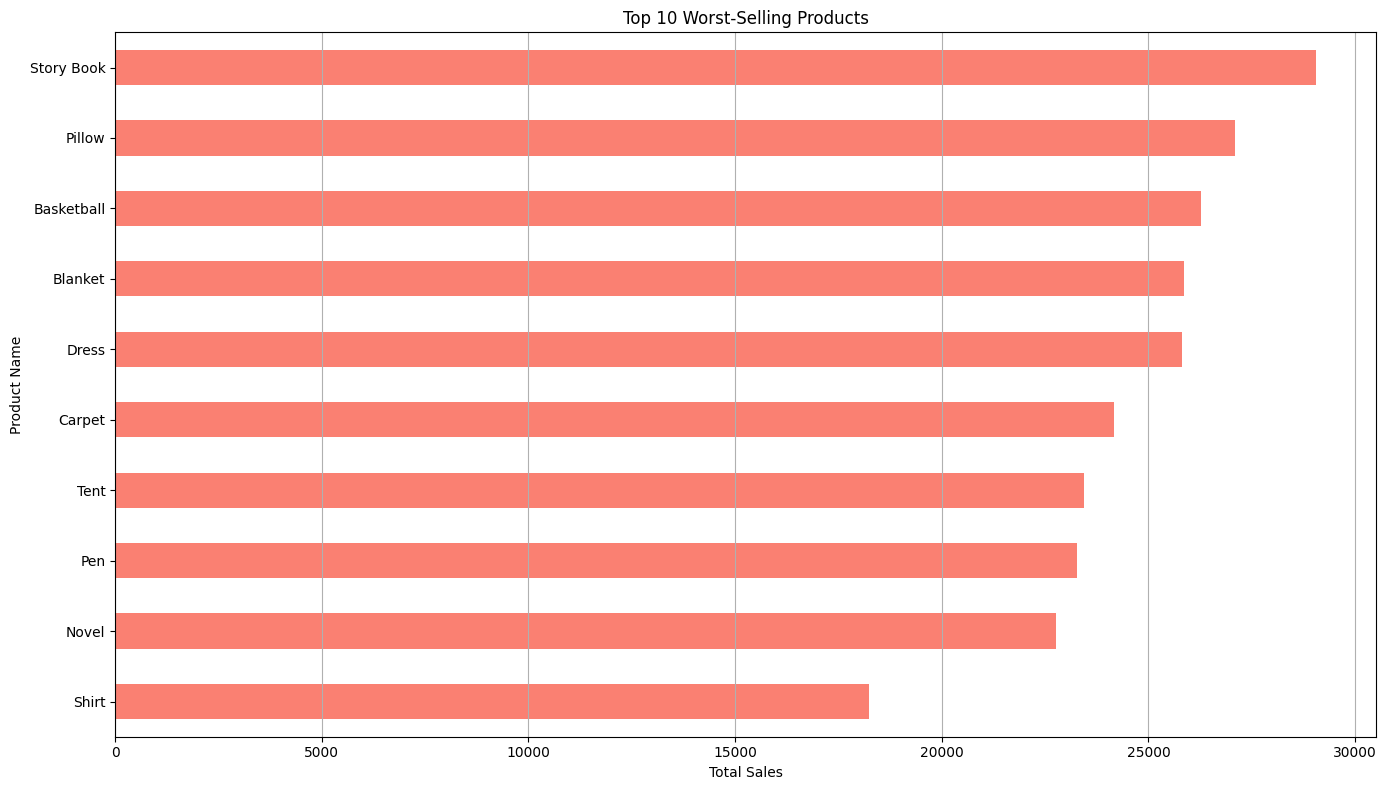

In [23]:
# Worst-selling products
worst_products = df.groupby('product_name')['TotalPrice'].sum().sort_values(ascending=True).head(10)
print(worst_products)

plt.figure(figsize=(14, 8))
worst_products.plot(kind='barh', color='salmon')

plt.title('Top 10 Worst-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

category_name
Electronics           648
Sports & Outdoors     625
Fashion               564
Home & Living         563
Books & Stationery    547
Name: quantity, dtype: int64


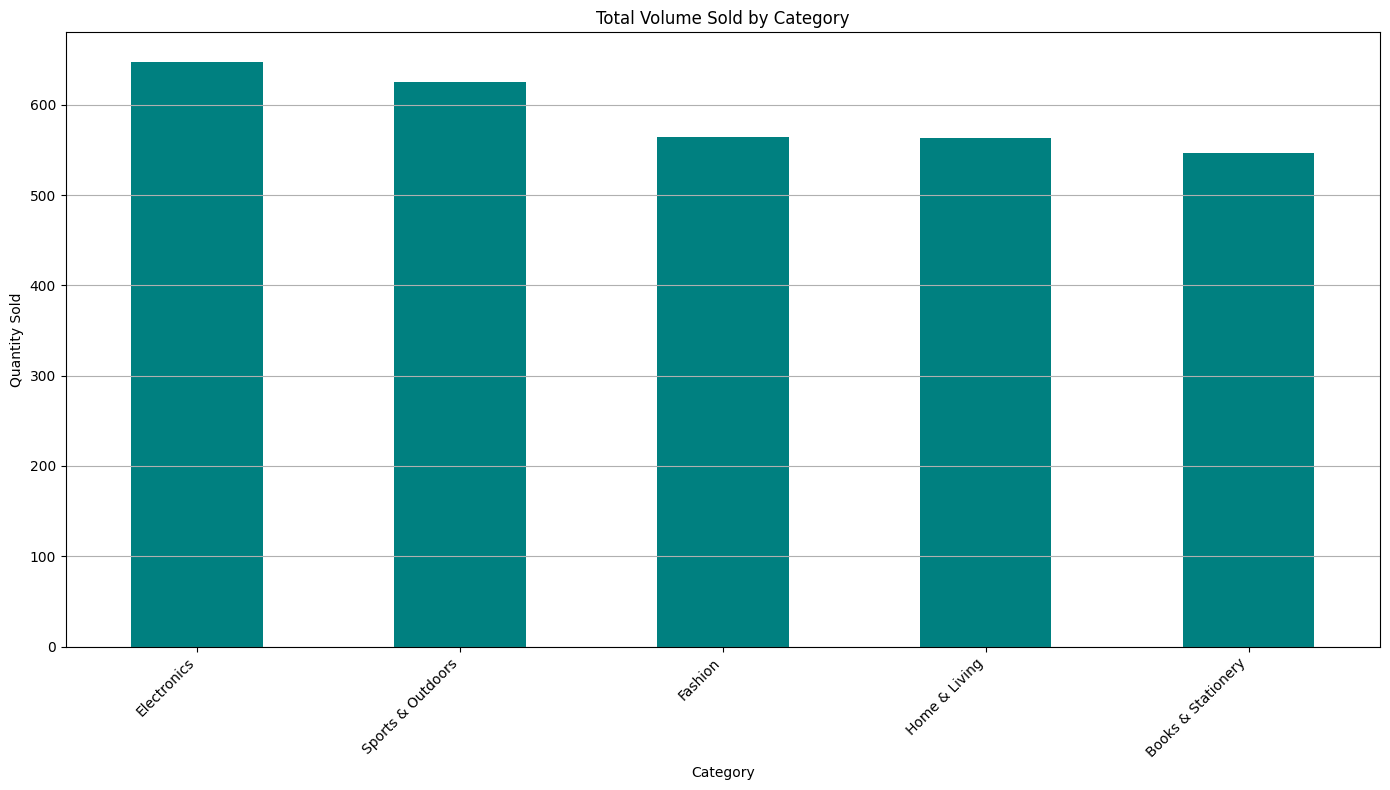

In [24]:
# Volume by brand/category
volume_by_category = df.groupby('category_name')['quantity'].sum().sort_values(ascending=False)
print(volume_by_category)

plt.figure(figsize=(14, 8))
volume_by_category.plot(kind='bar', color='teal')
plt.title('Total Volume Sold by Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

product_name
Smartphone       159
Yoga Mat         149
Soccer Ball      137
T-shirt          135
Laptop           134
Notebook         131
Eraser           131
Running Shoes    131
Headphones       128
Vase             128
Name: quantity, dtype: int64


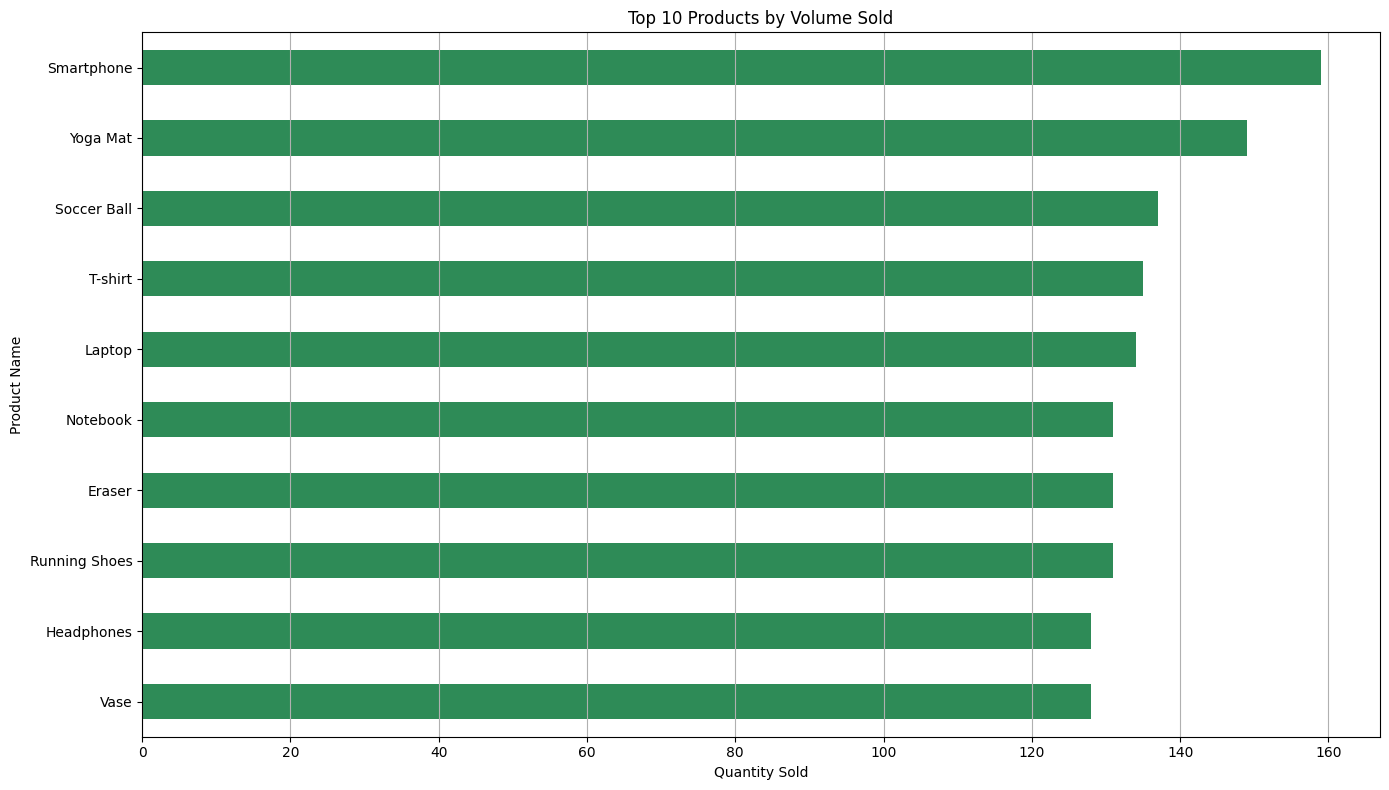

In [25]:
volume_by_product = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
print(volume_by_product)

plt.figure(figsize=(14, 8))
volume_by_product.plot(kind='barh', color='seagreen')
plt.title('Top 10 Products by Volume Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

product_name
Smartwatch     883.891667
Story Book     880.683939
Notebook       864.265455
Tablet         861.051795
Soccer Ball    835.273333
Vase           825.425128
Smartphone     815.303404
Laptop         800.009500
T-shirt        767.963500
Painting       748.966667
Name: TotalPrice, dtype: float64


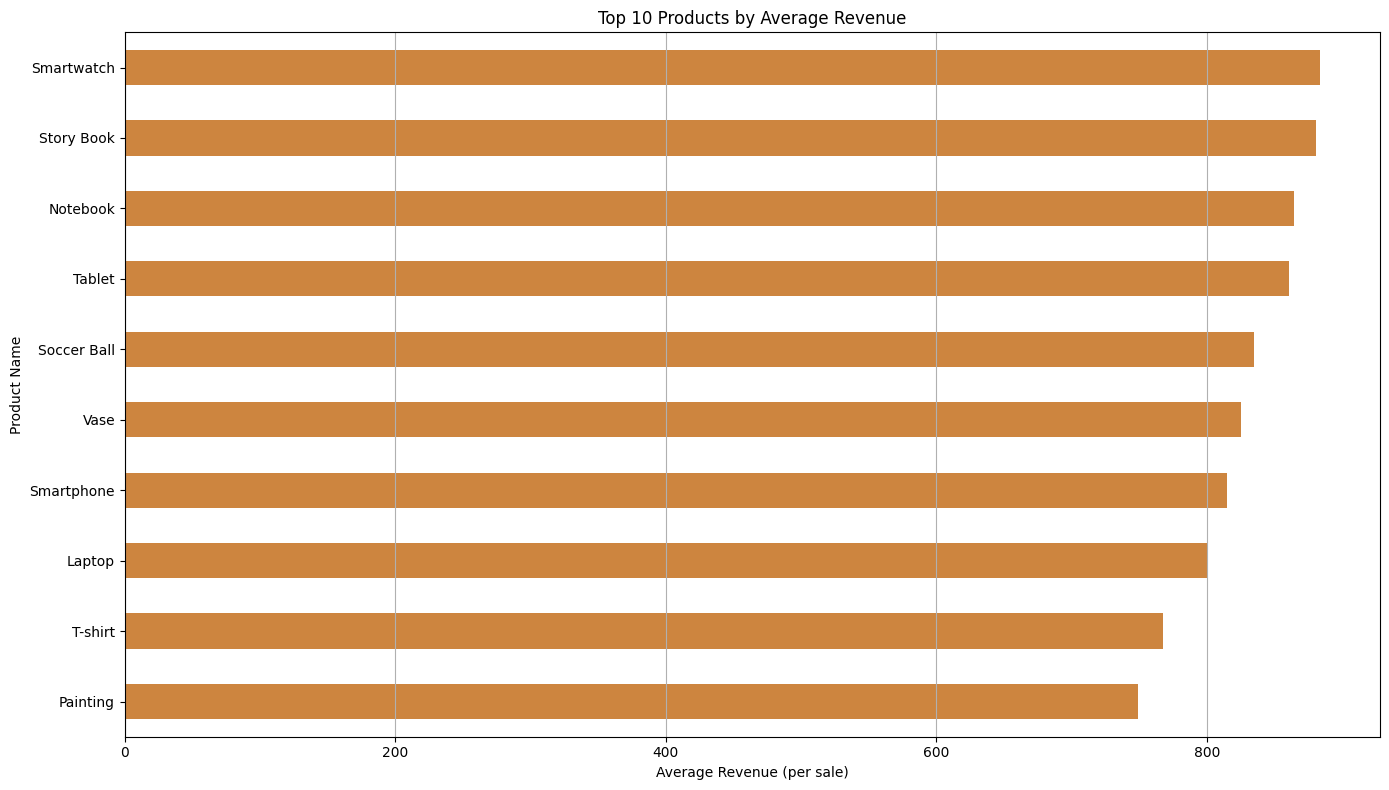

In [26]:
# Avg revenue per product/category
avg_rev_product = df.groupby('product_name')['TotalPrice'].mean().sort_values(ascending=False).head(10)
print(avg_rev_product)

plt.figure(figsize=(14, 8))
avg_rev_product.plot(kind='barh', color='peru')
plt.title('Top 10 Products by Average Revenue')
plt.xlabel('Average Revenue (per sale)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

category_name
Electronics           804.397778
Books & Stationery    742.049326
Sports & Outdoors     731.498863
Home & Living         725.341099
Fashion               680.376818
Name: TotalPrice, dtype: float64


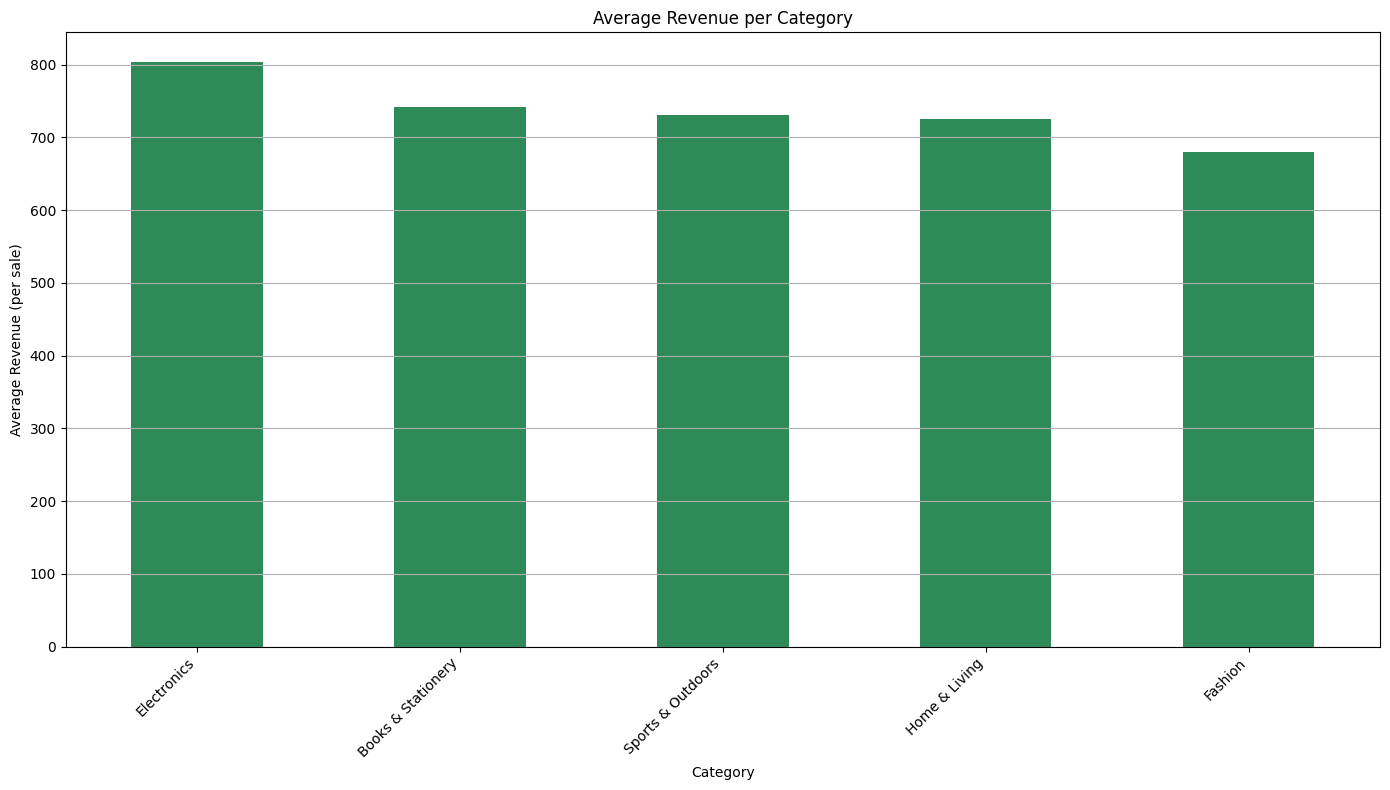

In [27]:
avg_rev_category = df.groupby('category_name')['TotalPrice'].mean().sort_values(ascending=False)
print(avg_rev_category)


plt.figure(figsize=(14, 8))
avg_rev_category.plot(kind='bar', color='seagreen')
plt.title('Average Revenue per Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (per sale)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


category_name
Electronics           166510.34
Sports & Outdoors     154346.26
Books & Stationery    143215.52
Home & Living         138540.15
Fashion               134714.61
Name: TotalPrice, dtype: float64


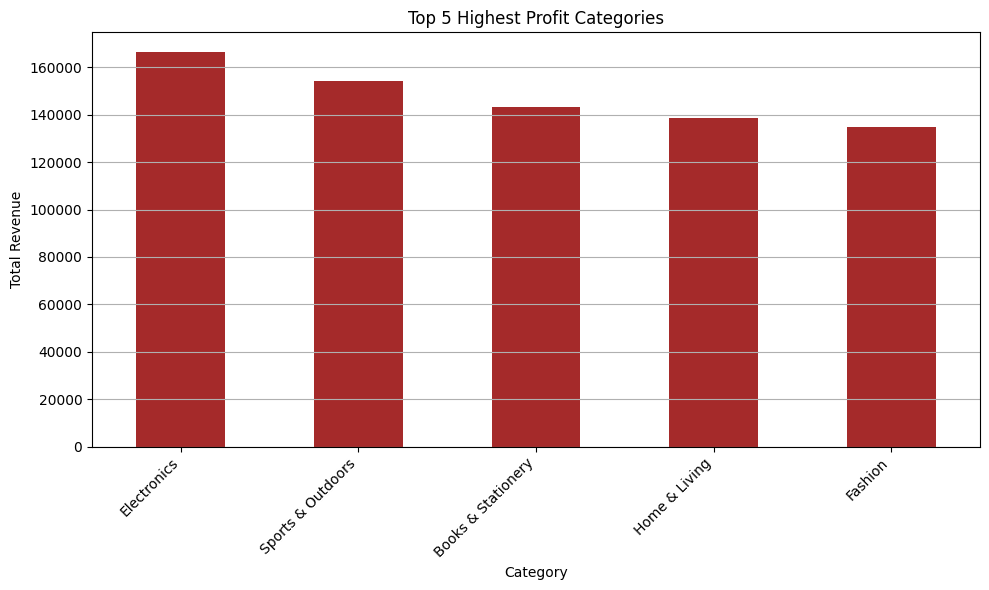

In [28]:
# Highest profit category
profit_category = df.groupby('category_name')['TotalPrice'].sum().sort_values(ascending=False).head()
print(profit_category)

plt.figure(figsize=(10, 6))
profit_category.plot(kind='bar', color='brown')
plt.title('Top 5 Highest Profit Categories')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Customer Demographics**

Age distribution:
Age Group
<18       18
18-30    207
30-40    170
40-50    181
50-60    164
60+      260
Name: count, dtype: int64


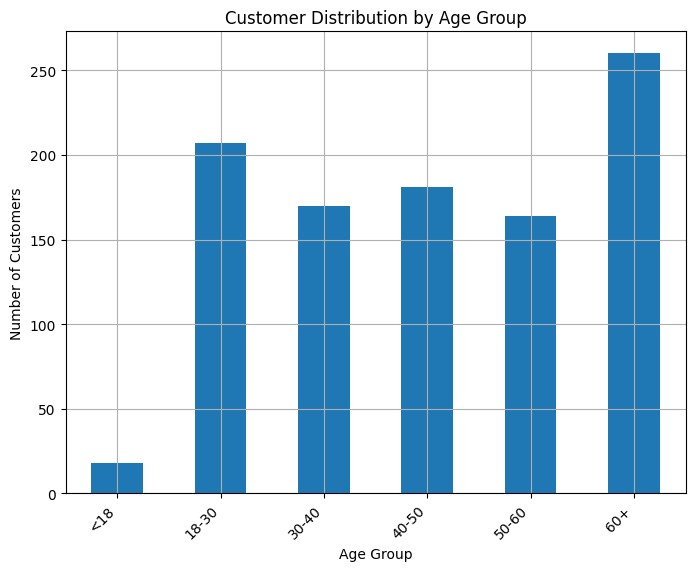

In [30]:
# Distribution by age
df['Age Group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 100],
                         labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+'])
age_distribution = df['Age Group'].value_counts().sort_index()
print("Age distribution:")
print(age_distribution)

plt.figure(figsize=(8, 6))
age_distribution.plot(kind='bar', title='Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Gender distributio:
gender
M    457
F    440
Name: count, dtype: int64
Gender distribution in percentage:
gender
M    50.947603
F    49.052397
Name: proportion, dtype: float64


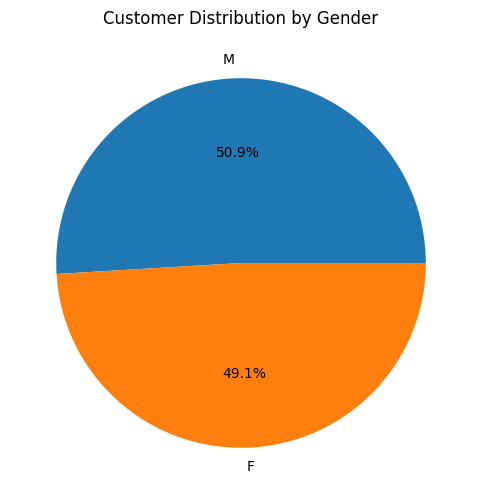

In [31]:
# Gender distribution
gender_distribution = df['gender'].value_counts()
print("Gender distributio:")
print(gender_distribution)
gender_distribution_p = df['gender'].value_counts(normalize=True) * 100
print("Gender distribution in percentage:")
print(gender_distribution_p)
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Customer Distribution by Gender')
plt.ylabel('')
plt.show()

<ipython-input-32-80dc5a817b99>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_distribution = df.groupby(['Age Group', 'gender']).size().unstack()


Gender distribution by Age Group:
gender       F    M
Age Group          
<18          6   11
18-30       83  100
30-40       67   78
40-50       87   80
50-60       77   68
60+        120  120


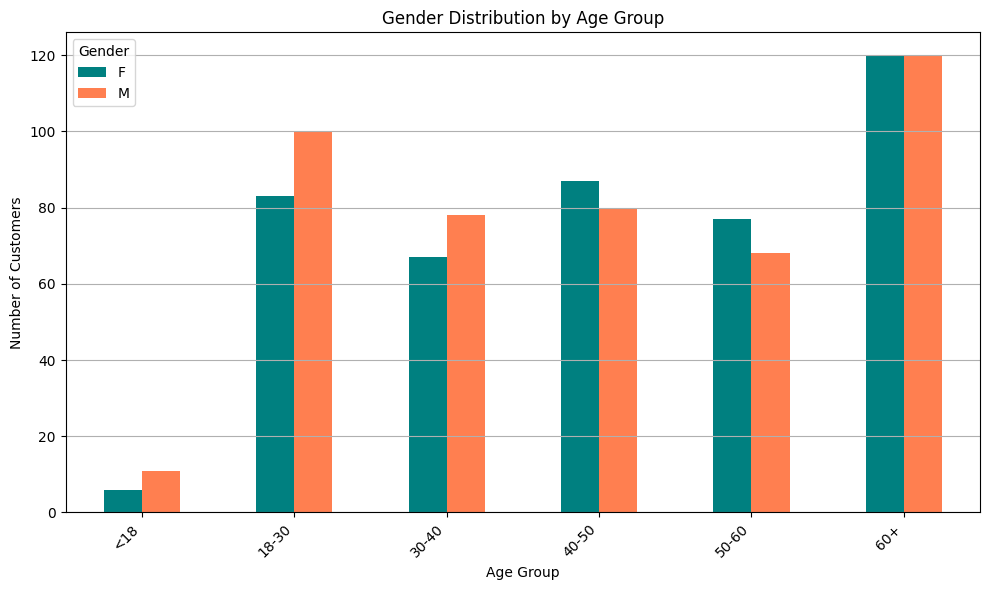

In [32]:
# Gender distribution by age
df['Age Group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 100],
                         labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+'])

# Count the number of customers by Age Group and Gender
gender_age_distribution = df.groupby(['Age Group', 'gender']).size().unstack()

print("Gender distribution by Age Group:")
print(gender_age_distribution)

# Plot the gender distribution as grouped bars
gender_age_distribution.plot(kind='bar', figsize=(10, 6), color=['teal', 'coral'])
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [36]:
df

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,InvoiceDate,TotalPrice,Month,Week,Year,Quarter,Age Group
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56,2024-12-17,746.72,2024-12,51,2024,4,50-60
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59,2024-06-01,1496.70,2024-06,22,2024,2,50-60
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64,2025-02-04,115.00,2025-02,6,2025,1,60+
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34,2024-10-28,460.22,2024-10,44,2024,4,30-40
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33,2024-05-10,706.88,2024-05,19,2024,2,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30,2024-05-04,1485.72,2024-05,18,2024,2,18-30
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72,2024-09-12,2138.65,2024-09,37,2024,3,60+
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49,2024-11-06,1773.20,2024-11,45,2024,4,40-50
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71,2024-09-17,886.16,2024-09,38,2024,3,60+


Total Amount by Age Group:
Age Group
<18       12241.90
18-30    153838.86
30-40    113746.47
40-50    139168.57
50-60    124459.36
60+      193871.72
Name: TotalPrice, dtype: float64


<ipython-input-37-b777e0f404b8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_amount_distribution = df.groupby('Age Group')['TotalPrice'].sum()


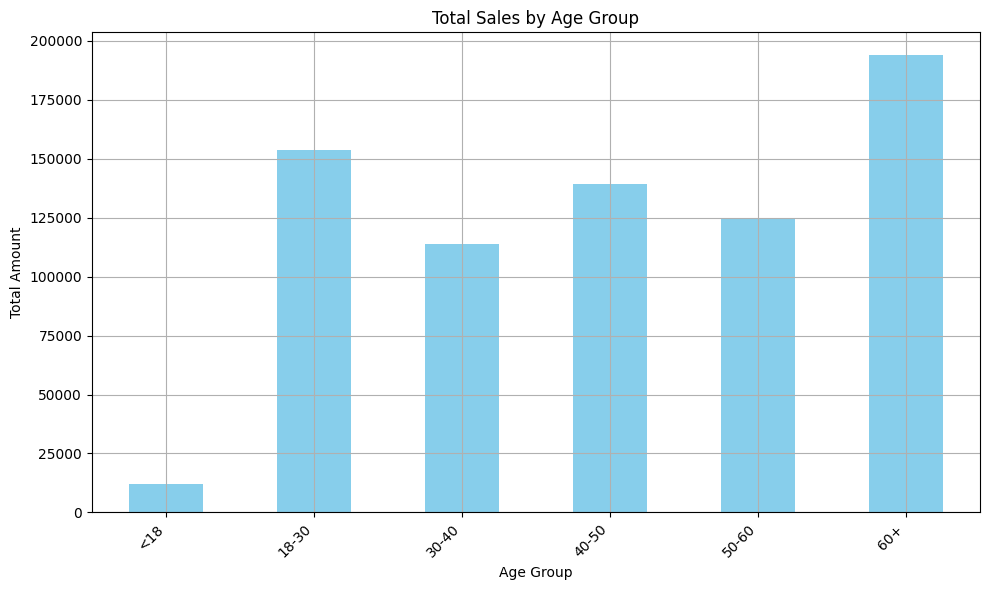

In [37]:
age_amount_distribution = df.groupby('Age Group')['TotalPrice'].sum()
print("Total Amount by Age Group:")
print(age_amount_distribution)
plt.figure(figsize=(10, 6))
age_amount_distribution.plot(kind='bar', color='skyblue', title='Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-38-a4ead4098e85>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_sales = df.groupby(['gender', 'Age Group'])['TotalPrice'].sum().unstack()


Total Sales by Gender and Age Group:
Age Group      <18     18-30     30-40     40-50     50-60       60+
gender                                                              
F          3610.56  57447.93  48309.90  68110.63  61821.96  92452.67
M          8330.32  80997.96  53046.56  59653.99  47195.99  84669.37


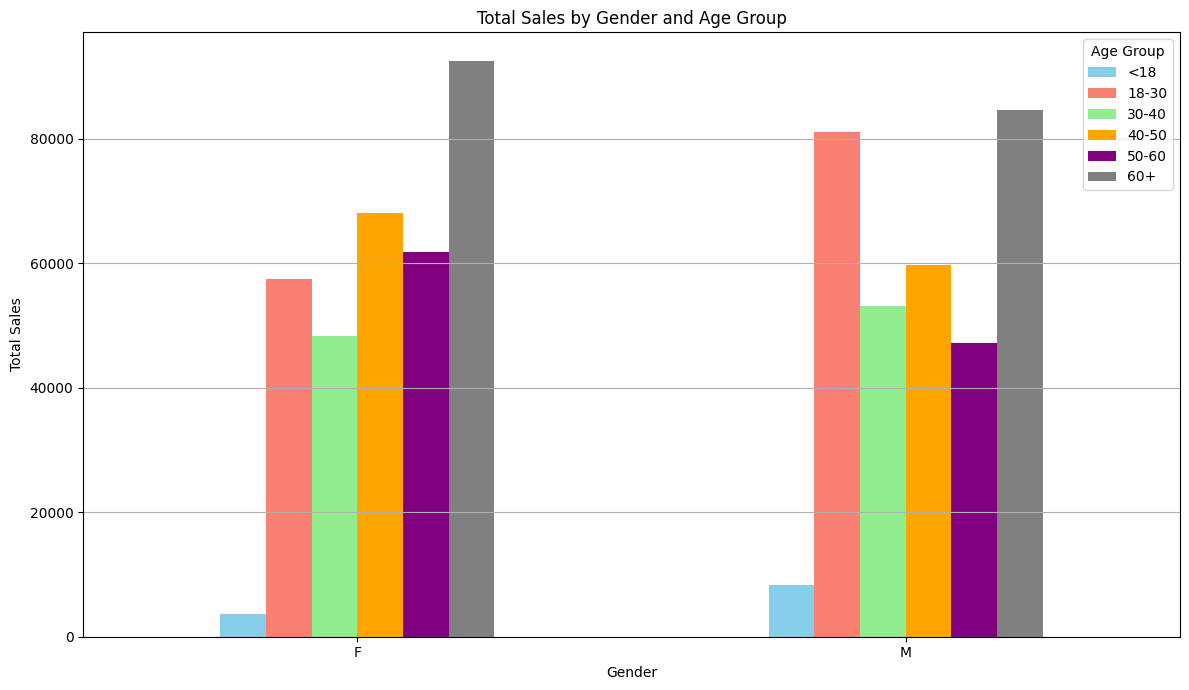

In [38]:
# Group by Gender and Age Group,
gender_age_sales = df.groupby(['gender', 'Age Group'])['TotalPrice'].sum().unstack()

print("Total Sales by Gender and Age Group:")
print(gender_age_sales)

# Plot total sales by gender and age group
gender_age_sales.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gray'])
plt.title('Total Sales by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Geographical insights**

city
Port Matthew           3
East David             3
East William           3
New Michaeltown        2
Lewisfort              2
Williamsfort           2
South Michael          2
New Melissa            2
Port Melissaborough    2
Bradleyview            2
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Port Matthew'),
  Text(1, 0, 'East David'),
  Text(2, 0, 'East William'),
  Text(3, 0, 'New Michaeltown'),
  Text(4, 0, 'Lewisfort'),
  Text(5, 0, 'Williamsfort'),
  Text(6, 0, 'South Michael'),
  Text(7, 0, 'New Melissa'),
  Text(8, 0, 'Port Melissaborough'),
  Text(9, 0, 'Bradleyview')])

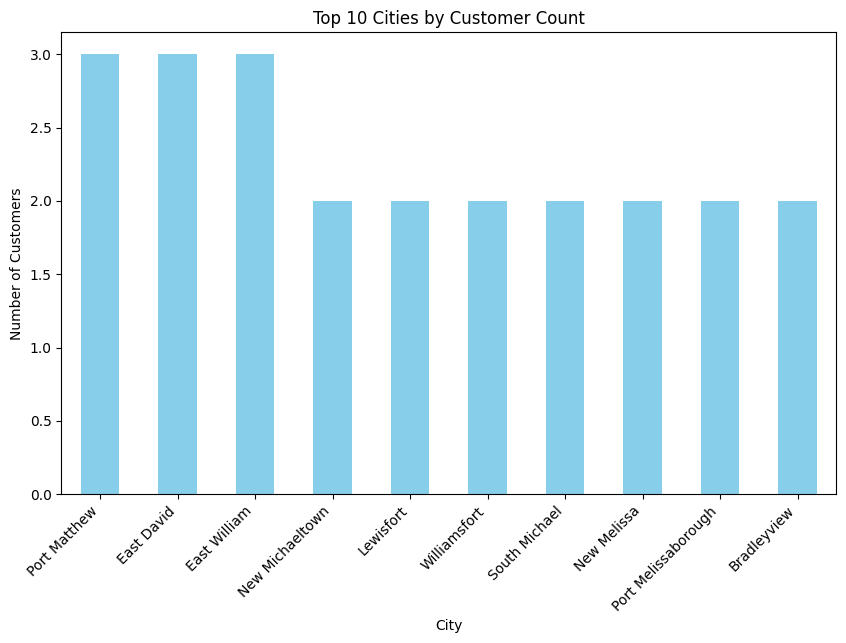

In [44]:
# City by highest customers
city_dist = df['city'].value_counts().head(10)
print(city_dist)

plt.figure(figsize=(10, 6))
city_dist.plot(kind='bar', color='skyblue', title='Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

city
Anthonyville          1
Michellebury          1
Floydchester          1
East Josestad         1
East Chris            1
West Jessica          1
Audreystad            1
North Cristianview    1
North Benjaminton     1
Lake Jennifer         1
Name: count, dtype: int64


Text(0, 0.5, 'Number of Customers')

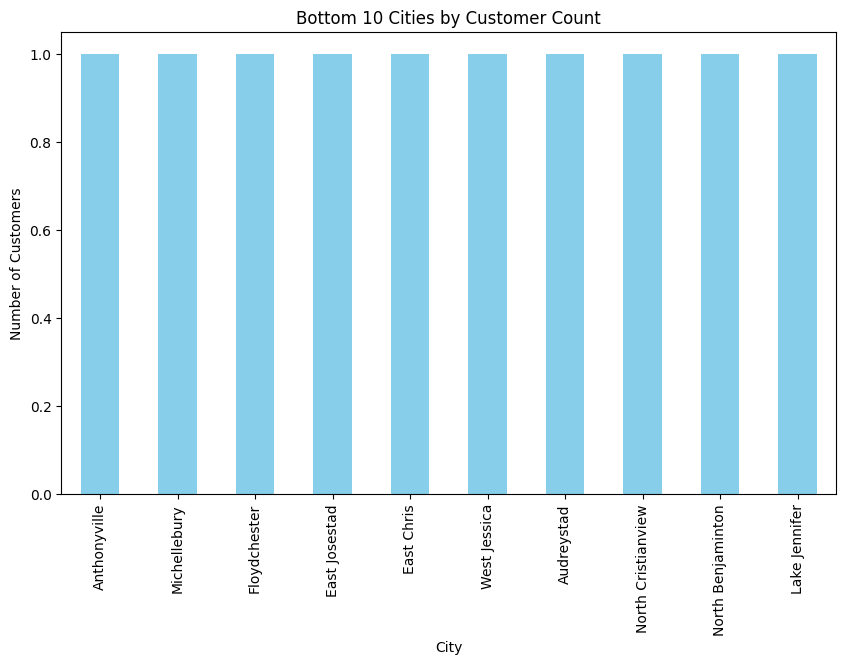

In [45]:
# City by lowest customer
city_dist = df['city'].value_counts().tail(10)
print(city_dist)

plt.figure(figsize=(10, 6))
city_dist.plot(kind='bar', color='skyblue', title='Bottom 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')

city
Port Melissaborough    3941.29
Patriciaville          3324.10
Johnsonborough         3045.09
East William           3011.36
East Christopher       2919.20
East David             2888.53
Port Matthew           2708.05
Lewisfort              2700.90
Brownbury              2603.16
South Elizabeth        2581.12
Name: TotalPrice, dtype: float64


Text(0, 0.5, 'Total Profit')

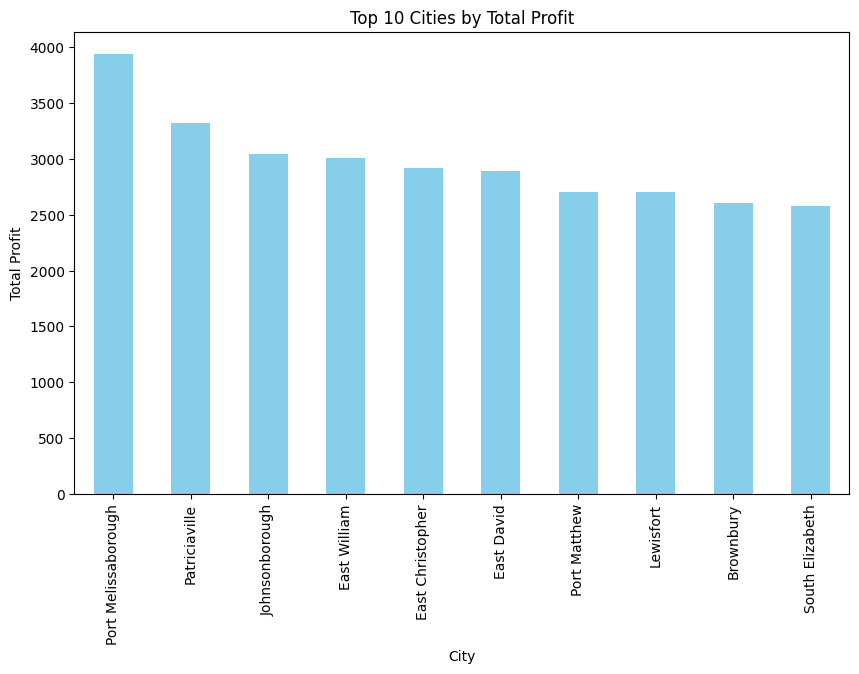

In [46]:
# city by highest profit
city_profit = df.groupby('city')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(city_profit)

plt.figure(figsize=(10, 6))
city_profit.plot(kind='bar', color='skyblue', title='Top 10 Cities by Total Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')

city
Jonathanstad          20.84
North Diane           21.44
Williamton            22.21
Port Kimberlymouth    24.00
Gonzalezshire         27.65
Anthonyport           34.64
Lake Kristy           35.52
North Janet           36.52
Douglasport           38.38
Jeffreyville          38.67
Name: TotalPrice, dtype: float64


Text(0, 0.5, 'Loss Amount')

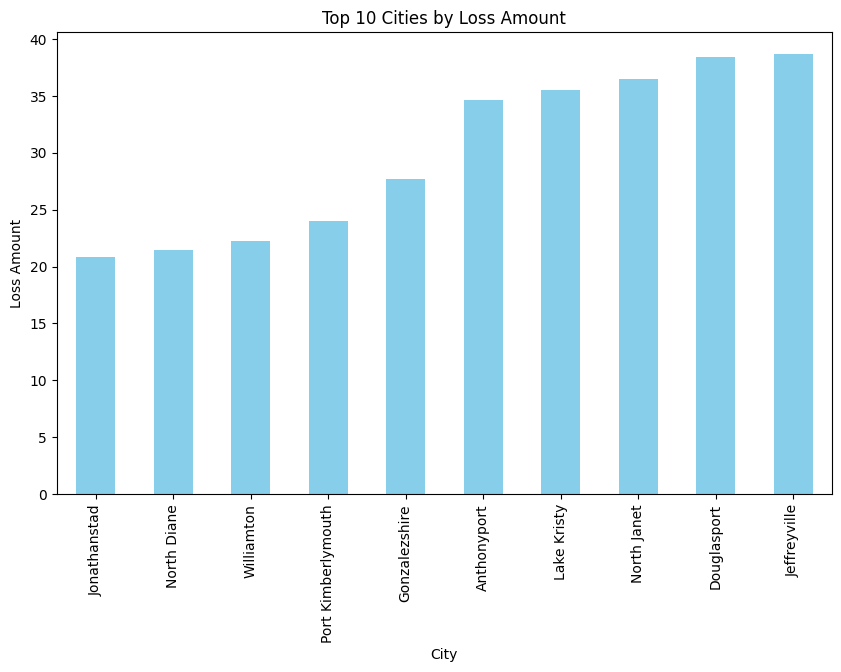

In [47]:
# city by loss amount
city_loss = df.groupby('city')['TotalPrice'].sum().sort_values(ascending=True).head(10)
print(city_loss)

plt.figure(figsize=(10, 6))
city_loss.plot(kind='bar', color='skyblue', title='Top 10 Cities by Loss Amount')
plt.xlabel('City')
plt.ylabel('Loss Amount')

# **Customer Behavior**

In [51]:
# Items bought together
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

basket = df.groupby('customer_id')['product_name'].apply(list).values.tolist()
te = TransactionEncoder()
te_array = te.fit_transform(basket)
df_tf = pd.DataFrame(te_array, columns=te.columns_)
frequent_items = apriori(df_tf, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

print(frequent_items.head(10))

   support      itemsets
0    0.036  (Basketball)
1    0.039     (Blanket)
2    0.037      (Carpet)
3    0.038       (Dress)
4    0.048      (Eraser)
5    0.045  (Headphones)
6    0.040      (Laptop)
7    0.044    (Notebook)
8    0.032       (Novel)
9    0.039    (Painting)


In [59]:
# Average review score
avg_score = df.groupby("category_name")["review_score"].mean().sort_values(ascending=False)
print(avg_score)

category_name
Sports & Outdoors     4.090909
Electronics           3.988166
Books & Stationery    3.973333
Fashion               3.968553
Home & Living         3.935897
Name: review_score, dtype: float64


In [60]:
# review score by gender
review_score_gender = df.groupby(['gender', 'review_score']).size().unstack()
print(review_score_gender)


review_score  1.0  2.0  3.0  4.0  5.0
gender                               
F              34   21   50   92  159
M              22   28   44   87  184


In [63]:
# review score by product
review_score_product = df.groupby("product_name")["review_score"].mean().sort_values(ascending=False)
print(review_score_product)

product_name
Story Book       4.400000
Running Shoes    4.258065
Blanket          4.222222
Headphones       4.212121
Soccer Ball      4.176471
Dress            4.137931
Smartphone       4.128205
Skirt            4.121212
Basketball       4.100000
Novel            4.095238
Painting         4.066667
T-shirt          4.058824
Yoga Mat         4.026316
Pillow           4.000000
Pen              3.933333
Notebook         3.914286
Laptop           3.914286
Tent             3.906250
Tablet           3.906250
Pants            3.837838
Carpet           3.758621
Smartwatch       3.733333
Eraser           3.717949
Shirt            3.653846
Vase             3.566667
Name: review_score, dtype: float64


In [64]:
# review score by category
review_score_category = df.groupby("category_name")["review_score"].mean().sort_values(ascending=False)
print(review_score_category)

category_name
Sports & Outdoors     4.090909
Electronics           3.988166
Books & Stationery    3.973333
Fashion               3.968553
Home & Living         3.935897
Name: review_score, dtype: float64


     review_score Sentiment
0             1.0  Negative
1             NaN   Neutral
2             5.0  Positive
3             5.0  Positive
4             1.0  Negative
..            ...       ...
995           NaN   Neutral
996           3.0   Neutral
997           NaN   Neutral
998           3.0   Neutral
999           1.0  Negative

[1000 rows x 2 columns]


<ipython-input-67-ec8b54191eea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')


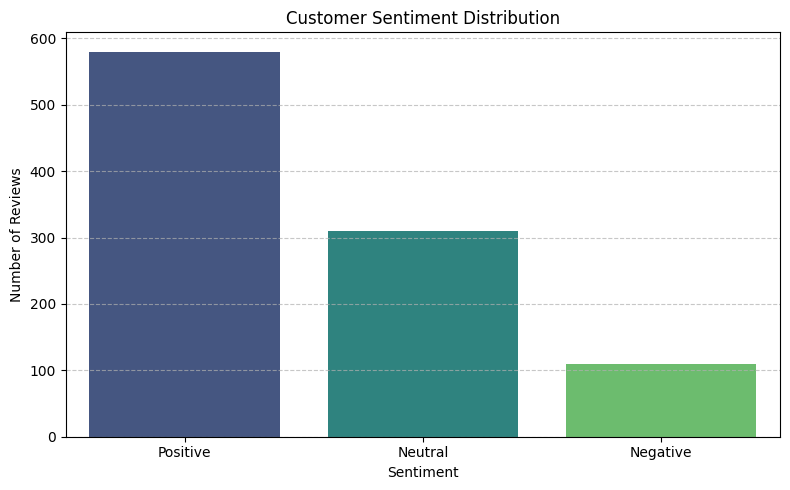

In [67]:
# customer sentiment analysis
from textblob import TextBlob

df['Sentiment'] = df['review_score'].apply(lambda x: 'Positive' if x >= 4 else 'Negative' if x <= 2 else 'Neutral')
print(df[['review_score', 'Sentiment']])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Customer Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Prediction and Correlation**

/usr/local/lib/python3.11/dist-packages/holidays/deprecations/v1_incompatibility.py:40: FutureIncompatibilityWarning: 

This is a future version incompatibility warning from Holidays v0.69
to inform you about an upcoming change in our API versioning strategy that may affect your
project's dependencies. Starting from version 1.0 onwards, we will be following a loose form of
Semantic Versioning (SemVer, https://semver.org) to provide clearer communication regarding any
potential breaking changes.

This means that while we strive to maintain backward compatibility, there might be occasional
updates that introduce breaking changes to our API. To ensure the stability of your projects,
we highly recommend pinning the version of our API that you rely on. You can pin your current
holidays v0.x dependency (e.g., holidays==0.69) or limit it (e.g., holidays<1.0) in order to
avoid potentially unwanted upgrade to the version 1.0 when it's released (ETA 2025Q1-Q2).

If you have any questions or conc

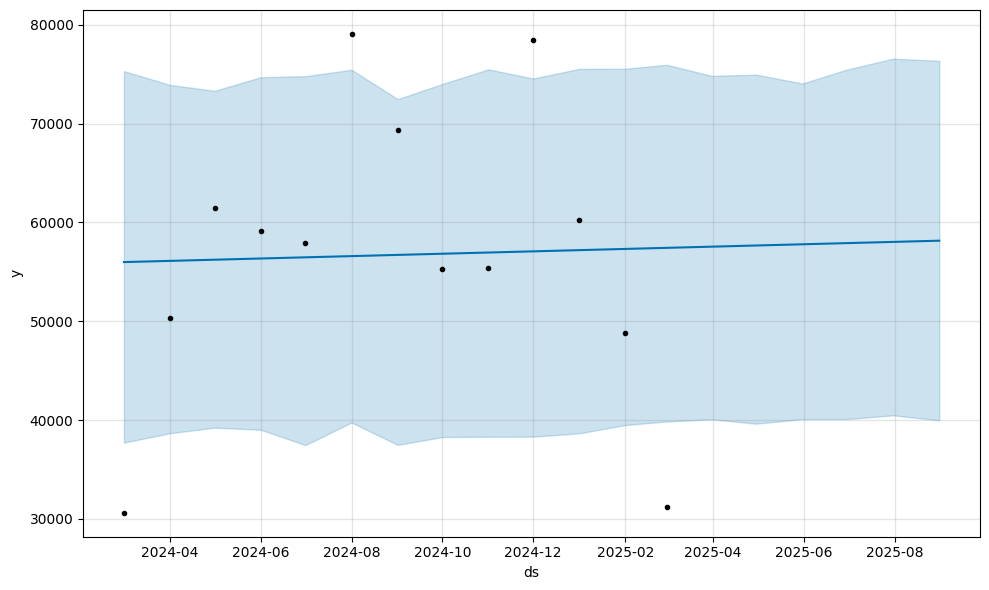

In [69]:
# predict future sales trend
from prophet import Prophet

# Prepare data for Prophet
sales_df = monthly_sales.rename(columns={'Month': 'ds', 'TotalPrice': 'y'})

model = Prophet()
model.fit(sales_df)

# Predict next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast);

<ipython-input-70-33b8e43afebe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalPrice', y='product_name', palette='viridis')


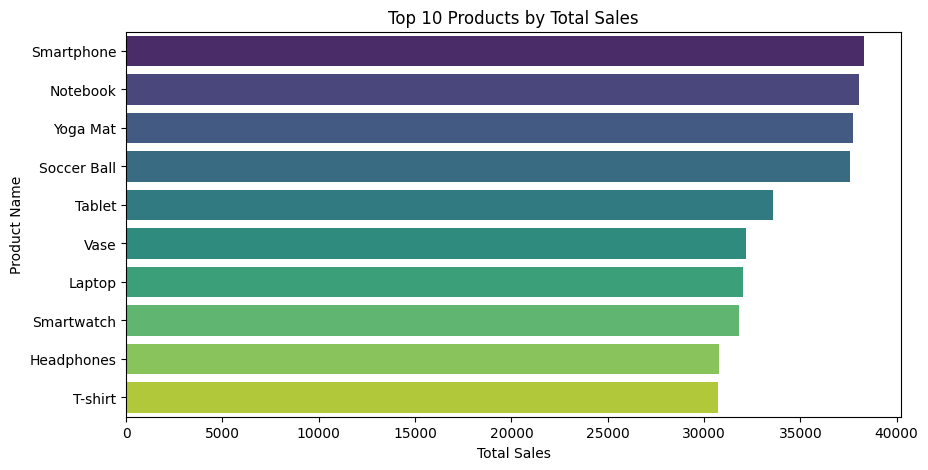

In [70]:
# predict future top product
# Group by product and calculate total sales
product_sales = df.groupby('product_name')['TotalPrice'].sum().reset_index()

# Sort top products
top_products = product_sales.sort_values('TotalPrice', ascending=False).head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=top_products, x='TotalPrice', y='product_name', palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


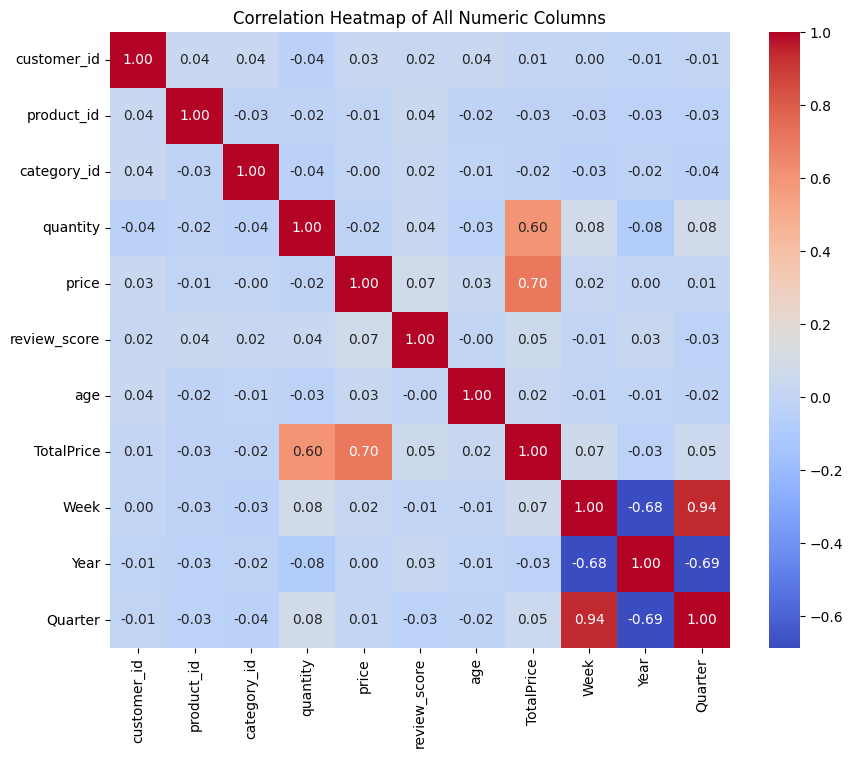

In [71]:
# Compute correlation on all numeric columns automatically
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Numeric Columns')
plt.show()
